In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Set your Quandl API key
quandl.ApiConfig.api_key = "vJSxz6aLFGy93K1pDtzx"

In [3]:
# Define the two securities you want to trade
security1 = "AAPL"
security2 = "MSFT"



In [12]:
# Retrieve historical price data using Quandl
data1 = quandl.get("WIKI/" + security1, start_date="2018-01-01", end_date="2022-01-01")
data2 = quandl.get("WIKI/" + security2, start_date="2018-01-01", end_date="2022-01-01")

data1

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,170.160,172.3000,169.2600,172.260,25048048.0,0.0,1.0,170.160,172.3000,169.2600,172.260,25048048.0
2018-01-03,172.530,174.5500,171.9600,172.230,28819653.0,0.0,1.0,172.530,174.5500,171.9600,172.230,28819653.0
2018-01-04,172.540,173.4700,172.0800,173.030,22211345.0,0.0,1.0,172.540,173.4700,172.0800,173.030,22211345.0
2018-01-05,173.440,175.3700,173.0500,175.000,23016177.0,0.0,1.0,173.440,175.3700,173.0500,175.000,23016177.0
2018-01-08,174.350,175.6100,173.9300,174.350,20134092.0,0.0,1.0,174.350,175.6100,173.9300,174.350,20134092.0
2018-01-09,174.550,175.0600,173.4100,174.330,21262614.0,0.0,1.0,174.550,175.0600,173.4100,174.330,21262614.0
2018-01-10,173.160,174.3000,173.0000,174.290,23589129.0,0.0,1.0,173.160,174.3000,173.0000,174.290,23589129.0
2018-01-11,174.590,175.4886,174.4900,175.280,17523256.0,0.0,1.0,174.590,175.4886,174.4900,175.280,17523256.0
2018-01-12,176.180,177.3600,175.6500,177.090,25039531.0,0.0,1.0,176.180,177.3600,175.6500,177.090,25039531.0


In [5]:
# Calculate the spread between the two securities' prices
spread = data1['Adj. Close'] - data2['Adj. Close']

# Compute z-score of the spread
zscore = (spread - np.mean(spread)) / np.std(spread)

# Create a training dataset for SVM
X = zscore.values[:-1].reshape(-1, 1)
y = np.where(zscore.values[1:] > 0, 1, 0)



In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM on the training data
svm_classifier.fit(X_train, y_train)

# Predict trading signals on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


ValueError: 'c' argument has 12 elements, which is inconsistent with 'x' and 'y' with size 58.

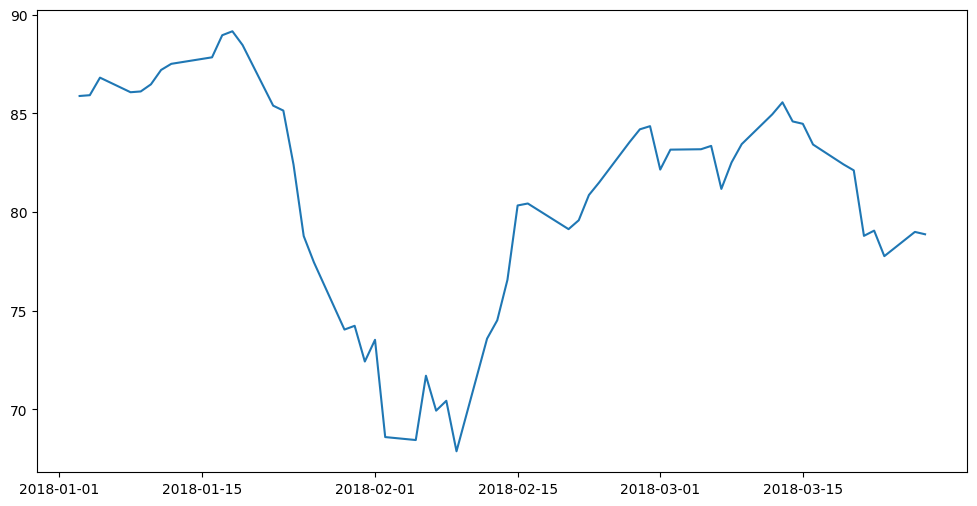

In [8]:
# Implement trading strategy based on SVM predictions
# Here, you can enter long/short positions based on the predicted signals
# and manage the positions using appropriate risk management techniques.
# This part involves real trading considerations and is beyond the scope of this example.

# Visualize spread and trading signals
plt.figure(figsize=(12, 6))
plt.plot(spread.index[1:], spread.values[1:], label="Spread")
plt.scatter(spread.index[1:], spread.values[1:], c=y_pred, cmap='coolwarm', marker='o', label="Trading Signals")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.title("Pairs Trading with SVM Signals")
plt.show()